In [4]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv("/Learning/Python/JupyterNotebooks/py-master/ML/13_kmeans/income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


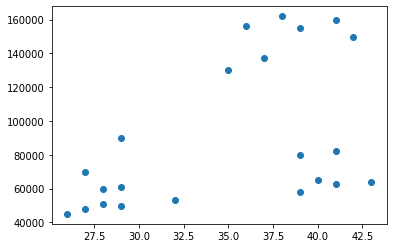

In [7]:
plt.scatter(df['Age'],df['Income($)'])

In [8]:
km = KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2],
      dtype=int32)

In [10]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,0


Text(0, 0.5, 'Income')

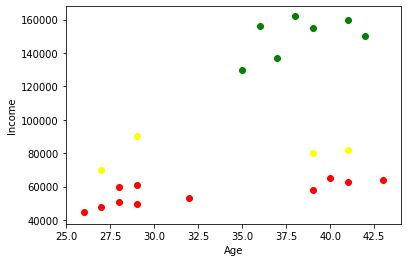

In [22]:
df1 = df[df['cluster']==0]
df2 = df[df['cluster']==1]
df3 = df[df['cluster']==2]

plt.scatter(df1['Age'],df1['Income($)'],color="green")
plt.scatter(df2['Age'],df2['Income($)'],color="yellow")
plt.scatter(df3['Age'],df3['Income($)'],color="red")

plt.xlabel("Age")
plt.ylabel("Income")

In [27]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [28]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [29]:
df['cluster1'] = y_predicted
df.head()

,Name,Age,Income($),cluster,cluster1
0,Rob,0.058824,0.213675,1,1
1,Michael,0.176471,0.384615,1,1
2,Mohan,0.176471,0.136752,2,1
3,Ismail,0.117647,0.128205,2,1
4,Kory,0.941176,0.897436,0,0


In [31]:
# Centroid of the 3 cluster
km.cluster_centers_  

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

Text(0, 0.5, 'Income')

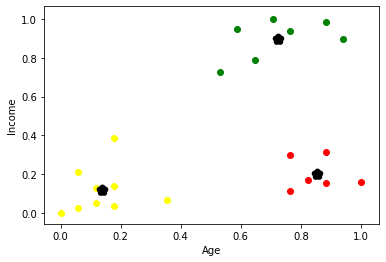

In [36]:
df1 = df[df['cluster1']==0]
df2 = df[df['cluster1']==1]
df3 = df[df['cluster1']==2]

plt.scatter(df1['Age'],df1['Income($)'],color="green")
plt.scatter(df2['Age'],df2['Income($)'],color="yellow")
plt.scatter(df3['Age'],df3['Income($)'],color="red")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="black",label="centroid",marker="*",linewidths=6)


plt.xlabel("Age")
plt.ylabel("Income")

In [45]:
######
# Albo plot : how to decide how much will be the k value means how many cluster will be best fit? it can be decided 
#             using albo method which is nothing but SSE (sum of squared error)  
######
k_range = range(1,10)
SSE = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    SSE.append(km.inertia_)

print(SSE)

[5.434011511988176, 2.0911363886990766, 0.47507834985530945, 0.3491047094419564, 0.26217927623452125, 0.22020960864009392, 0.1746238658668789, 0.1326541982724516, 0.10383752586603558]


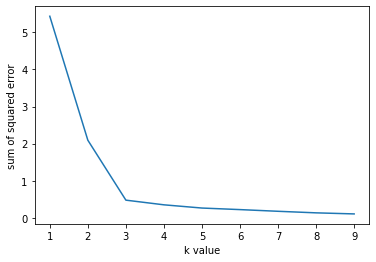

In [46]:
plt.xlabel("k value")
plt.ylabel("sum of squared error")
plt.plot(k_range,SSE)
#here in below example we can clearly see albo is at number 3 so k best fit value will be 3